<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap08a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 例題8.1

以下の2クラスのデータの平均ベクトルと共分散行列を求め、推定された正規分布をプロットせよ。

$\omega_1 = \{(3,4)^T, (3,8)^T, (2,6)^T, (4,6)^T\}$

$\omega_2 = \{(3,0)^T, (1,-2)^T, (5,-2)^T, (3,-4)^T\}$

データの準備と表示

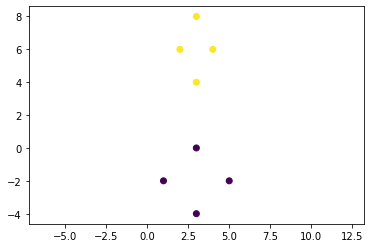

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

X = np.array([[3.0, 4.0], [3.0, 8.0], [2.0, 6.0], [4.0, 6.0],
              [3.0, 0.0], [1.0, -2.0], [5.0, -2.0], [3.0, -4.0]])
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.axis('equal')
plt.show()

平均ベクトルと共分散行列を計算

In [2]:
m1 = np.average(X[y==1], axis = 0)
m2 = np.average(X[y==0], axis = 0)
c1 = np.cov(X[y==1], bias=True, rowvar=False)
c2 = np.cov(X[y==0], bias=True, rowvar=False)

3Dプロット

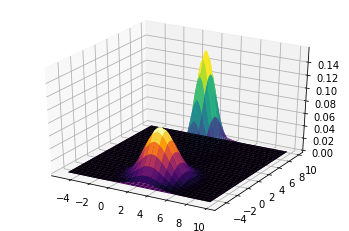

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Xax = np.arange(-5, 10, 0.25)
Yax = np.arange(-5, 10, 0.25)
Xax, Yax = np.meshgrid(Xax, Yax)
pos = np.empty(Xax.shape + (2,))
pos[:, :, 0] = Xax; pos[:, :, 1] = Yax
Z1 = multivariate_normal(m1, c1)
Z2 = multivariate_normal(m2, c2)
ax.plot_surface(Xax, Yax, Z1.pdf(pos), cmap='viridis',)
ax.plot_surface(Xax, Yax, Z2.pdf(pos), cmap='inferno',)
plt.show()

## 演習問題8-3

scikit-learnで単純ベイズ法による識別を行え。

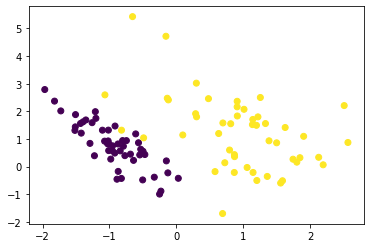

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

X_train, y_train = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=2)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train)

In [5]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

学習された分布のパラメータ

In [6]:
# 平均
clf.theta_

array([[-0.927878  ,  0.77832179],
       [ 0.93373095,  1.21390406]])

In [7]:
#分散
clf.sigma_

array([[0.19332632, 0.66148527],
       [0.64538151, 1.70368186]])

## EMアルゴリズムの例題

2つのクラスタからなるランダムなデータを生成し、EMアルゴリズムによって分布のパラメータを求めよ。


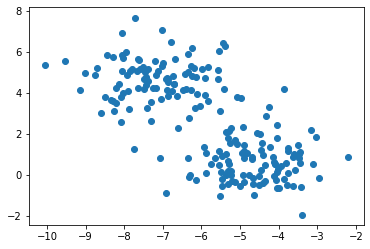

In [8]:
from sklearn.datasets import make_blobs
from sklearn import mixture
from matplotlib.colors import LogNorm

X_train, y_train = make_blobs(n_samples=200, centers=2, n_features=2, random_state=12)
plt.scatter(X_train[:, 0], X_train[:, 1])

In [9]:
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

学習された分布を表示

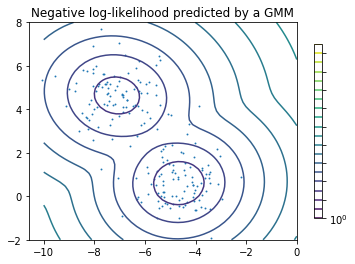

In [10]:
# display predicted scores by the model as a contour plot
x = np.linspace(-10., 0.)
y = np.linspace(-2., 8.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 20))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()